In [95]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings



In [96]:
df= pd.read_csv('Mall_Customers.csv')

In [97]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [98]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [99]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

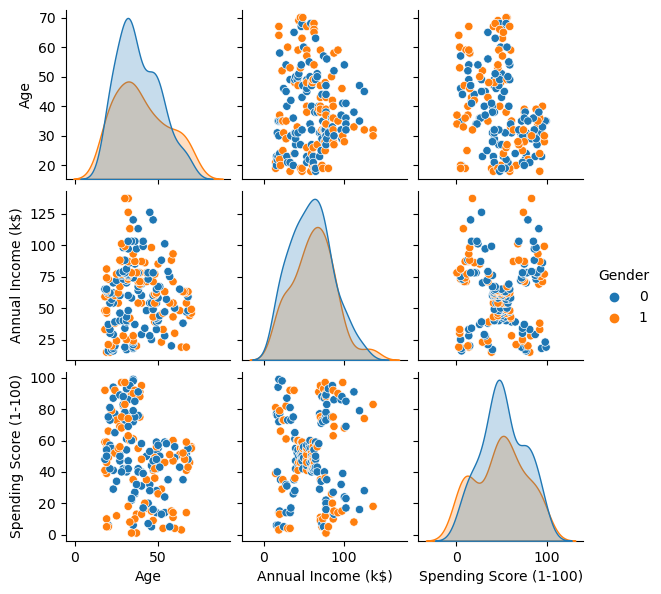

In [100]:
import seaborn as sns 
sns.pairplot(df.drop(['CustomerID'],axis=1),hue='Gender',height=2)
plt.show()

In [101]:
warnings.simplefilter("ignore")

wcss=[]
for i in range(1,11):
    k_means=KMeans(n_clusters=i)
    k_means.fit(X)
    wcss.append(k_means.inertia_)
print(wcss)
warnings.resetwarnings()

[269981.28, 181363.595959596, 106348.37306211118, 73679.78903948836, 44448.45544793371, 37233.81451071001, 30227.606513152015, 25007.38394731206, 21797.084944646373, 19701.352251281744]


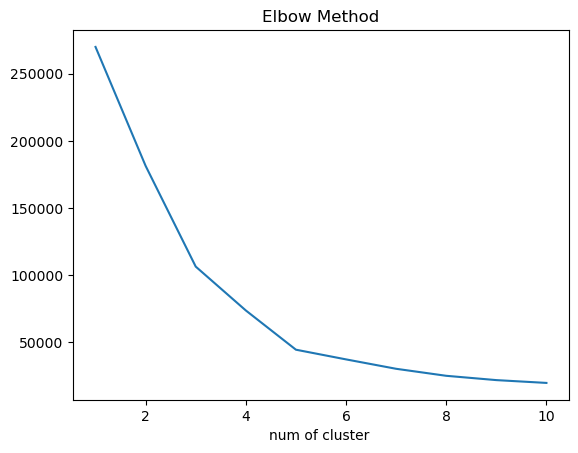

In [102]:
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("num of cluster ")
plt.show()

In [103]:
num_clusters = 5
num_iterations= 100

kmeans = KMeans(n_clusters=num_clusters,n_init=num_iterations, random_state=42)
predictions = kmeans.fit_predict(X)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [104]:
df['predictions']= predictions
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),predictions
0,1,1,19,15,39,4
1,2,1,21,15,81,2
2,3,0,20,16,6,4
3,4,0,23,16,77,2
4,5,0,31,17,40,4


In [105]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

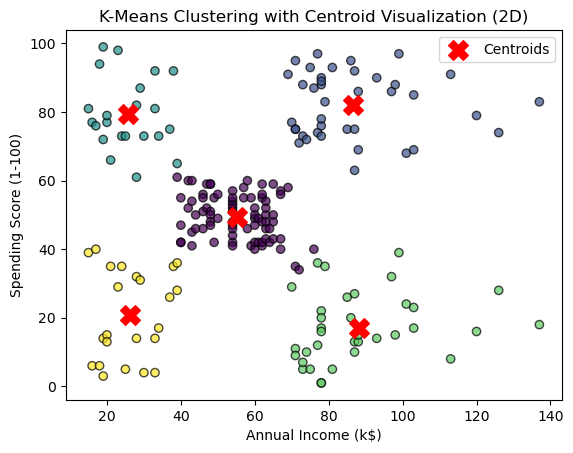

In [106]:
from sklearn.datasets import make_blobs

# Visualize the clusters and centroids
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=kmeans.labels_, cmap='viridis', alpha=0.7, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.title('K-Means Clustering with Centroid Visualization (2D)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
